<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Cars_24_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection

- Cars-24 Dataset.

- Now, you're aware that automobile industry is making a tranisition from **fuel (pertrol/diesel) based cars** to **Electric Cars (EVs)** because of high mileage given by EVs and other environmental concerns.

- As they are new in the industry, number of EVs is significantly smaller than the fuel-based cars.

- For used cars, one of the most important features that a buyer cares about is the mileage. We extracted two features namely '**Mileage**' and '**Price**' from the revised and newer data.

- We are using only these two features because these are the two most important things that buyer really cares about when purchasing a used car. In addition, for visual purposes, 2D data is easy to visualise which can help in understanding the algorithms that we are going to study in this lecture.

- Our task is to identify any novelties/anomalies/outliers that might be present in the data. Let's have a look at the data.

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg



Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 46.5MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [ ]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


- Notice, something strange here?

- Look at the **Min** and **Max** values for both the features.

- Lets plot this data on a scatterplot.

Text(0, 0.5, 'Price')

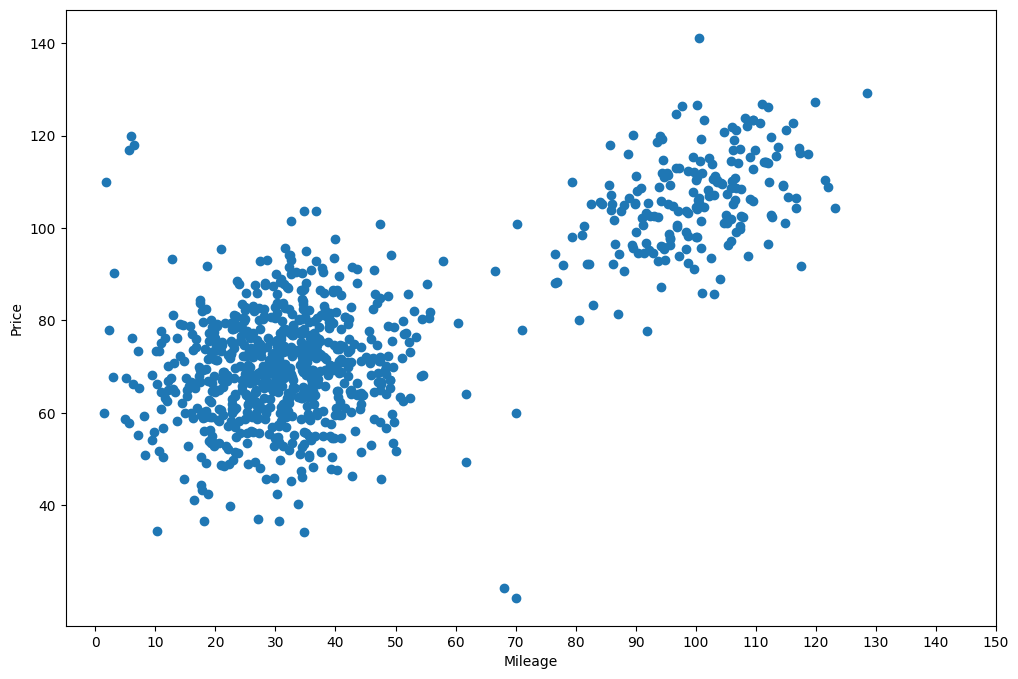

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

### Ellipctic Envelope

#### **Sklearn implementation**

Now we'll create a model EllipticEnvelope with some random state and then fit that model on our data

In [ ]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(df)
ee_pred = cov.predict(df)

In [ ]:
df['is_outlier_ee'] = ee_pred

Passing datapoints to predict whether it is an outlier or an inlier. Return $-1$ if outlier, or else it returns $1$

In [ ]:
cov.predict([[25, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but EllipticEnvelope was fitted with feature names



array([1])

Plotting the results of Elliptic Envelope

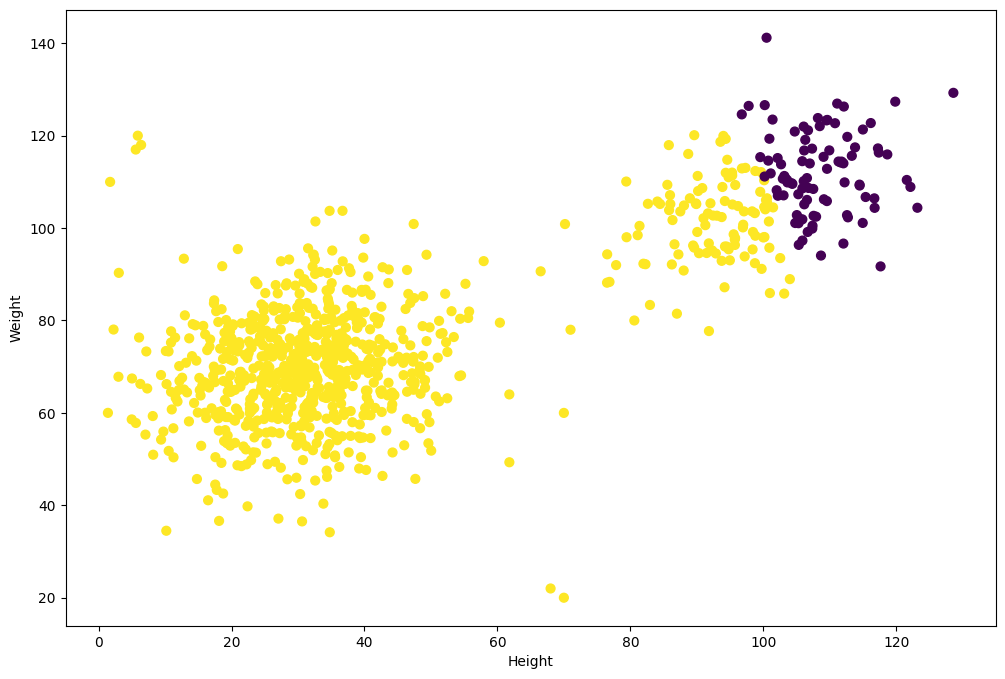

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.08).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



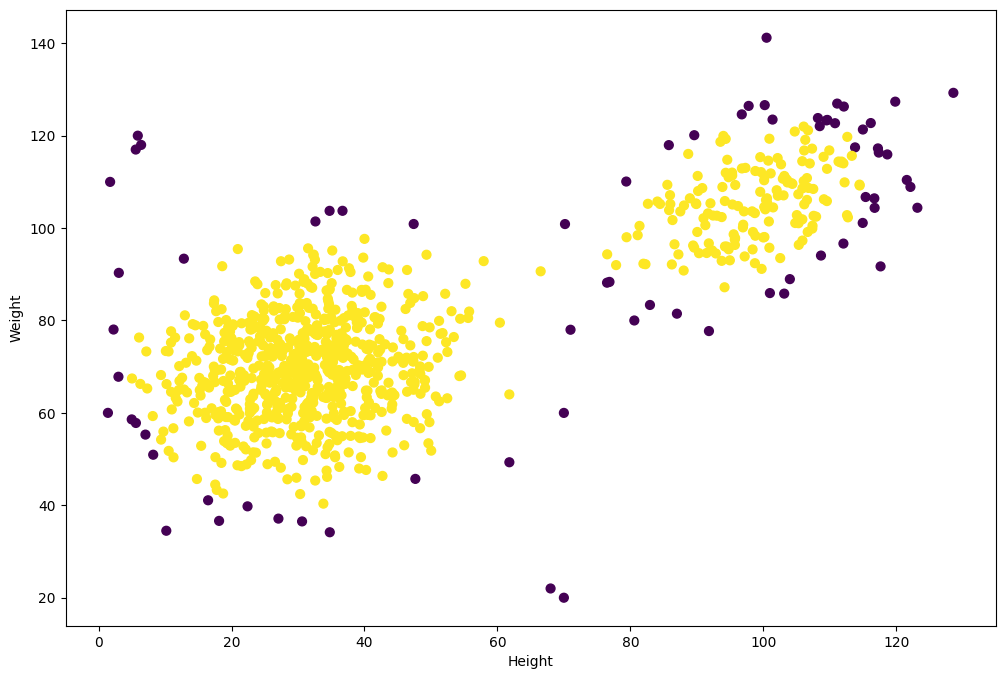

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Isolation Forests are heavily used when dataset size is very large because algorithms like Elliptical Envelope are typically harder and they have very strong assumptions


### LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

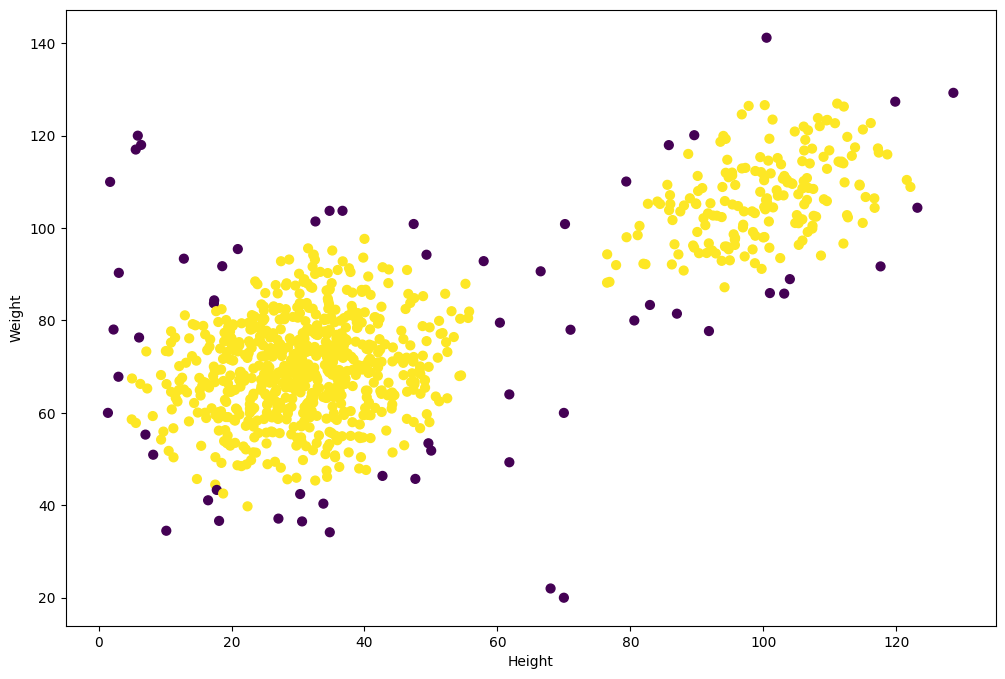

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()